In [1]:
import ROOT
from interface.CMS_lumi import CMS_lumi

ROOT.EnableImplicitMT()

Welcome to JupyROOT 6.24/06


In [2]:
rdf = ROOT.RDataFrame("outTree", "test_EEG.root")
rdf_conv_m2 = rdf.Filter("category == 2 && convMatched_lep1")
rdf_conv_m1 = rdf.Filter("category == 3 && convMatched_lep1")

In [3]:
total_m2 = rdf.Filter("category == 2").Count().GetValue()
conv_m2 = rdf_conv_m2.Count().GetValue()
ratio_conv_m2 = conv_m2 *100/ total_m2
conv_m2_16cm =  rdf_conv_m2.Filter("convVtxRadius_lep1 < 16").Count().GetValue()
conv_m2_2p9cm =  rdf_conv_m2.Filter("convVtxRadius_lep1 < 2.9").Count().GetValue()
print("number of M2 = {}, number of conv M2 = {}, ratio = {:.2f}%".format(total_m2, conv_m2, ratio_conv_m2))
print("{:.2f}% conversions have radius < 16 cm".format(conv_m2_16cm*100/conv_m2))
print("{:.2f}% conversions have radius < 2.9 cm".format(conv_m2_2p9cm*100/conv_m2))

conv_m2_2trks = rdf_conv_m2.Filter("convNTrks_lep1 == 2").Count().GetValue()
conv_m2_1trks = rdf_conv_m2.Filter("convNTrks_lep1 == 1").Count().GetValue()
print("number of conv M2 = {}, 2trks conv = {}, 1trks conv = {}, ratio_2trks = {:.2f}%, ratio_1trks = {:.2f}%".format(conv_m2, conv_m2_2trks, conv_m2_1trks, conv_m2_2trks*100/conv_m2, conv_m2_1trks*100/conv_m2))

number of M2 = 65870, number of conv M2 = 52005, ratio = 78.95%
71.13% conversions have radius < 16 cm
52.45% conversions have radius < 2.9 cm
number of conv M2 = 52005, 2trks conv = 46085, 1trks conv = 5920, ratio_2trks = 88.62%, ratio_1trks = 11.38%


In [4]:
total_m1 = rdf.Filter("category == 3").Count().GetValue()
conv_m1 = rdf_conv_m1.Count().GetValue()
ratio_conv_m1 = conv_m1*100/ total_m1
conv_m1_16cm =  rdf_conv_m1.Filter("convVtxRadius_lep1 < 16").Count().GetValue()
conv_m1_2p9cm =  rdf_conv_m1.Filter("convVtxRadius_lep1 < 2.9").Count().GetValue()
print("number of M1 = {}, number of conv M1 = {}, ratio = {:.2f}%".format(total_m1, conv_m1, ratio_conv_m1))
print("{:.2f}% conversions have radius < 16 cm".format(conv_m1_16cm*100/conv_m1))
print("{:.2f}% conversions have radius < 2.9 cm".format(conv_m1_2p9cm*100/conv_m1))

conv_m1_2trks = rdf_conv_m1.Filter("convNTrks_lep1 == 2").Count().GetValue()
conv_m1_1trks = rdf_conv_m1.Filter("convNTrks_lep1 == 1").Count().GetValue()
print("number of conv M1 = {}, 2trks conv = {}, 1trks conv = {}, ratio_2trks = {:.2f}%, ratio_1trks = {:.2f}%".format(conv_m1, conv_m1_2trks, conv_m1_1trks, conv_m1_2trks*100/conv_m1, conv_m1_1trks*100/conv_m1))

number of M1 = 24595, number of conv M1 = 10767, ratio = 43.78%
45.39% conversions have radius < 16 cm
27.41% conversions have radius < 2.9 cm
number of conv M1 = 10767, 2trks conv = 8431, 1trks conv = 2336, ratio_2trks = 78.30%, ratio_1trks = 21.70%


In [5]:
def Draw1DHist(c, vh, vc, vcl , xaxis = "x-axis", yaxis = "x-axis", option = "hist", Log = True):
    ROOT.gPad.SetRightMargin(0.05)
    ROOT.gPad.SetTopMargin(0.07)
    ROOT.gPad.SetLeftMargin(0.14)
    ROOT.gPad.SetBottomMargin(0.15)
    if (Log == True):
        c.SetLogy()

    # Set the axis style
    if (Log == True):
        ymax = vh[0].GetBinContent(vh[0].GetMaximumBin()) * 5
        ymin = 1E-2
    else: 
        ymax = vh[0].GetBinContent(vh[0].GetMaximumBin()) * 1.3
        ymin = 0
    vh[0].SetMarkerStyle(20)
    vh[0].SetMarkerSize(1.2)
    vh[0].GetXaxis().SetTitle(xaxis)
    vh[0].GetXaxis().SetMoreLogLabels()
    # vh[0].GetXaxis().SetTickSize(0.02)
    vh[0].GetXaxis().SetTitleSize(0.05)
    vh[0].GetXaxis().SetLabelSize(0.045)
    vh[0].GetXaxis().SetLabelOffset(0.02)
    vh[0].GetXaxis().SetTitleOffset(1.4)
    vh[0].GetYaxis().SetTitle(yaxis)
    vh[0].GetYaxis().SetRangeUser(ymin, ymax)
    # vh[0].GetYaxis().SetNdivisions(506)
    # vh[0].GetYaxis().SetTickSize(0.02)
    vh[0].GetYaxis().SetTitleSize(0.05)
    vh[0].GetYaxis().SetLabelSize(0.045)
    # vh[0].GetYaxis().SetLabelOffset(0.02)
    vh[0].GetYaxis().SetTitleOffset(1.4)

    # Set the color style and draw option
    for i, h in enumerate(vh):
        h.SetLineColor(ROOT.TColor.GetColor(vcl[i]))
        # h.SetLineWidth(4)
        h.SetFillColor(ROOT.TColor.GetColor(vc[i]))
        if (i == 0):
            h.Draw(option)
        else:
            h.Draw("%s same" %(option))
    return ymax

CMS (Preliminary) out of frame? --> True
lumiText =   (13 TeV)
procText =  


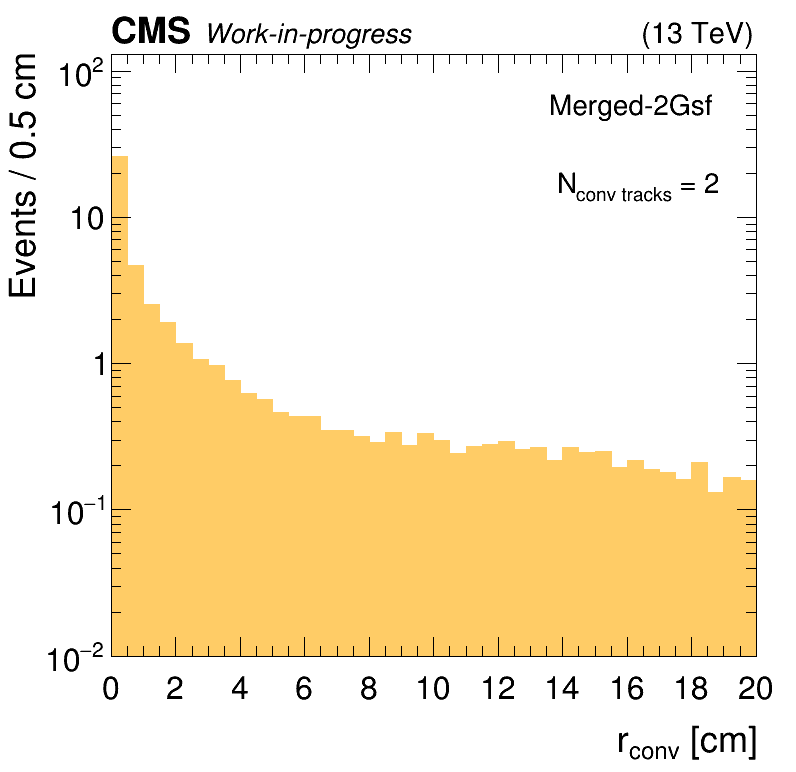

In [6]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)

h1 = rdf.Filter("category == 2 && convMatched_lep1 && convNTrks_lep1 == 2").Histo1D(("h1", " ", 40, 0, 20), "convVtxRadius_lep1", "mcwei")

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()
c1.SetLogy()

ymax = Draw1DHist(c1, [h1], ["#F8CE68"], ["#F8CE68"], xaxis = "r_{conv} [cm]", yaxis = "Events / 0.5 cm", option = "hist")
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.04)
ltx.DrawLatex(0.69, 0.85, "Merged-2Gsf")
ltx.DrawLatex(0.7, 0.75, "N_{conv tracks} = 2")

# l = ROOT.TLine(16.08, 1E-2, 16, ymax)
# l.Draw()

# b = ROOT.TBox(16.08, 1E-2, 20, ymax)
# b.SetFillColor(1)
# b.SetFillStyle(3004)
# b.Draw()

c1.Draw()

CMS (Preliminary) out of frame? --> True
lumiText =   (13 TeV)
procText =  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


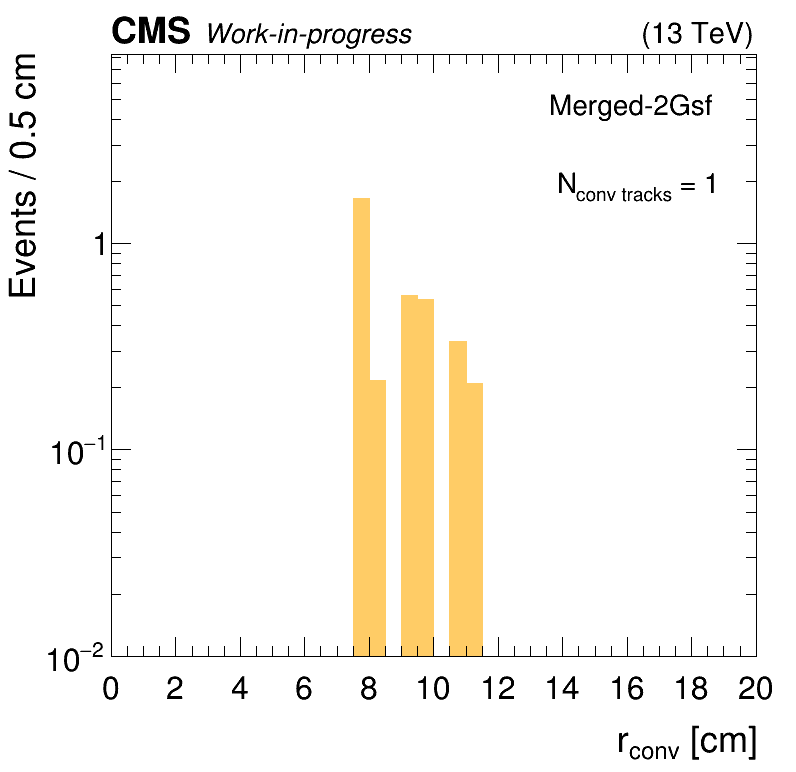

In [7]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)

h1 = rdf.Filter("category == 2 && convMatched_lep1 && convNTrks_lep1 == 1").Histo1D(("h1", " ", 40, 0, 20), "convVtxRadius_lep1", "mcwei")

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()
c1.SetLogy()

ymax = Draw1DHist(c1, [h1], ["#F8CE68"], ["#F8CE68"], xaxis = "r_{conv} [cm]", yaxis = "Events / 0.5 cm", option = "hist")
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.04)
ltx.DrawLatex(0.69, 0.85, "Merged-2Gsf")
ltx.DrawLatex(0.7, 0.75, "N_{conv tracks} = 1")

# l = ROOT.TLine(16.08, 1E-2, 16, ymax)
# l.Draw()

# b = ROOT.TBox(16.08, 1E-2, 20, ymax)
# b.SetFillColor(1)
# b.SetFillStyle(3004)
# b.Draw()

c1.Draw()

CMS (Preliminary) out of frame? --> True
lumiText =   (13 TeV)
procText =  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


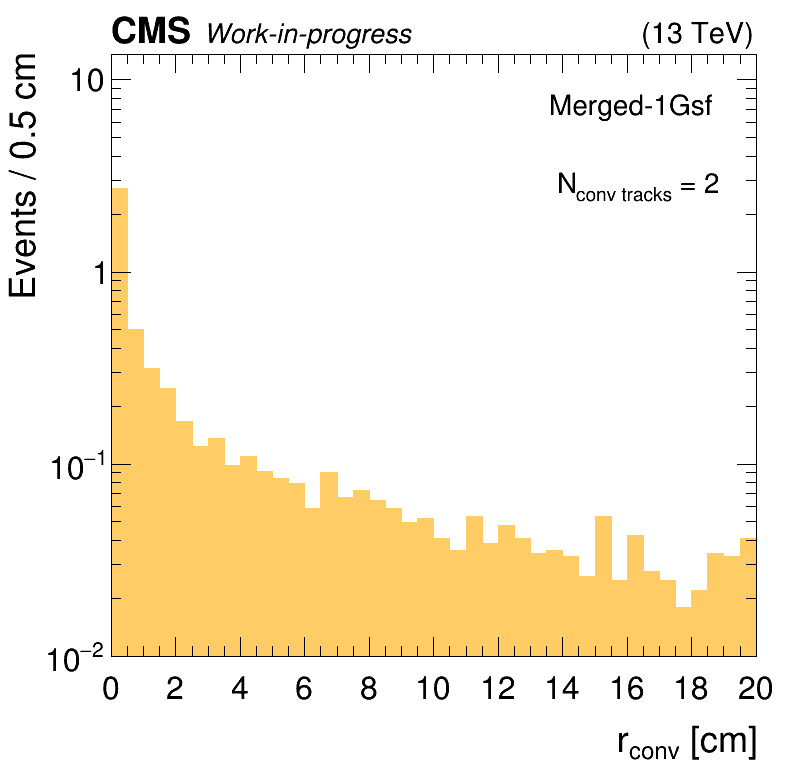

In [8]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)

h1 = rdf.Filter("category == 3 && convMatched_lep1 && convNTrks_lep1 == 2").Histo1D(("h1", " ", 40, 0, 20), "convVtxRadius_lep1", "mcwei")

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()
c1.SetLogy()

ymax = Draw1DHist(c1, [h1], ["#F8CE68"], ["#F8CE68"], xaxis = "r_{conv} [cm]", yaxis = "Events / 0.5 cm", option = "hist")
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.04)
ltx.DrawLatex(0.69, 0.85, "Merged-1Gsf")
ltx.DrawLatex(0.7, 0.75, "N_{conv tracks} = 2")

# l = ROOT.TLine(16.08, 1E-2, 16, ymax)
# l.Draw()

# b = ROOT.TBox(16.08, 1E-2, 20, ymax)
# b.SetFillColor(1)
# b.SetFillStyle(3004)
# b.Draw()

c1.Draw()

CMS (Preliminary) out of frame? --> True
lumiText =   (13 TeV)
procText =  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


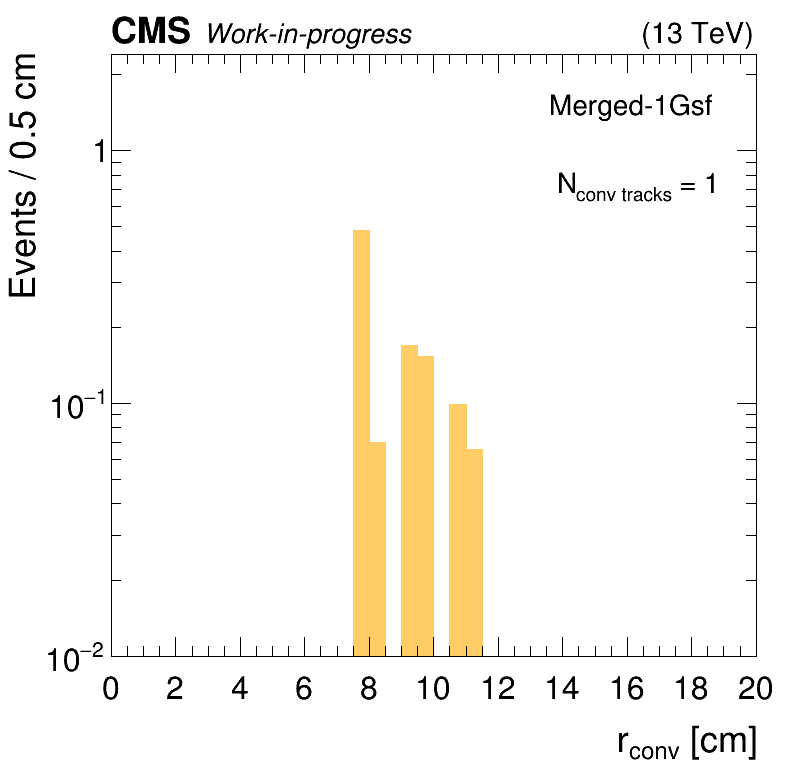

In [9]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)

h1 = rdf.Filter("category == 3 && convMatched_lep1 && convNTrks_lep1 == 1").Histo1D(("h1", " ", 40, 0, 20), "convVtxRadius_lep1", "mcwei")

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()
c1.SetLogy()

ymax = Draw1DHist(c1, [h1], ["#F8CE68"], ["#F8CE68"], xaxis = "r_{conv} [cm]", yaxis = "Events / 0.5 cm", option = "hist")
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.04)
ltx.DrawLatex(0.69, 0.85, "Merged-1Gsf")
ltx.DrawLatex(0.7, 0.75, "N_{conv tracks} = 1")

# l = ROOT.TLine(16.08, 1E-2, 16, ymax)
# l.Draw()

# b = ROOT.TBox(16.08, 1E-2, 20, ymax)
# b.SetFillColor(1)
# b.SetFillStyle(3004)
# b.Draw()

c1.Draw()

CMS (Preliminary) out of frame? --> True
lumiText =   (13 TeV)
procText =  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


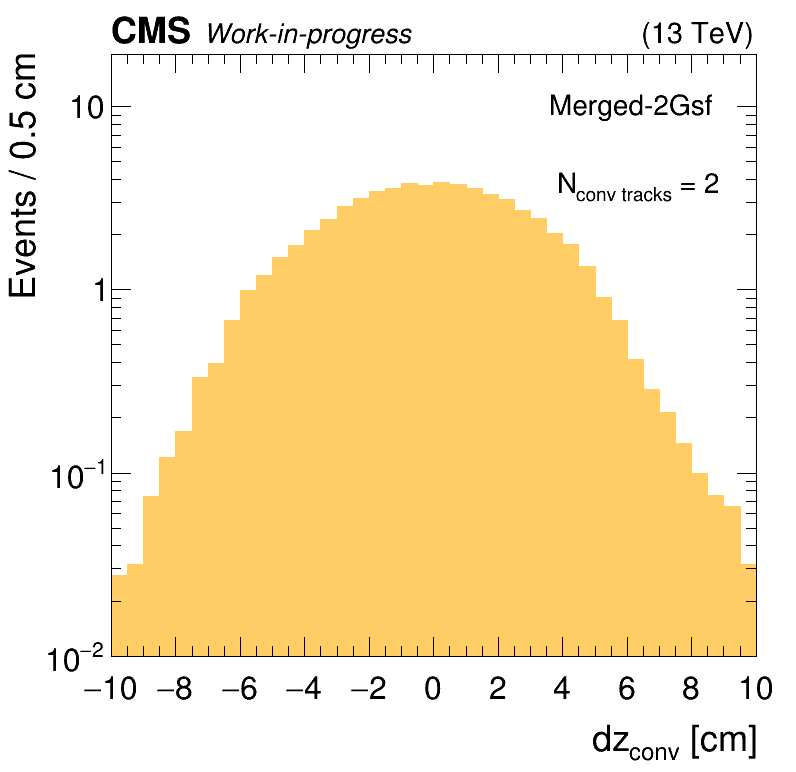

In [10]:
h1 = rdf.Filter("category == 2 && convMatched_lep1 && convNTrks_lep1 == 2").Histo1D(("h1", " ", 40, -10, 10), "convDz_lep1", "mcwei")

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()
c1.SetLogy()

ymax = Draw1DHist(c1, [h1], ["#F8CE68"], ["#F8CE68"], xaxis = "dz_{conv} [cm]", yaxis = "Events / 0.5 cm", option = "hist")
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.04)
ltx.DrawLatex(0.69, 0.85, "Merged-2Gsf")
ltx.DrawLatex(0.7, 0.75, "N_{conv tracks} = 2")

c1.Draw()

CMS (Preliminary) out of frame? --> True
lumiText =   (13 TeV)
procText =  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


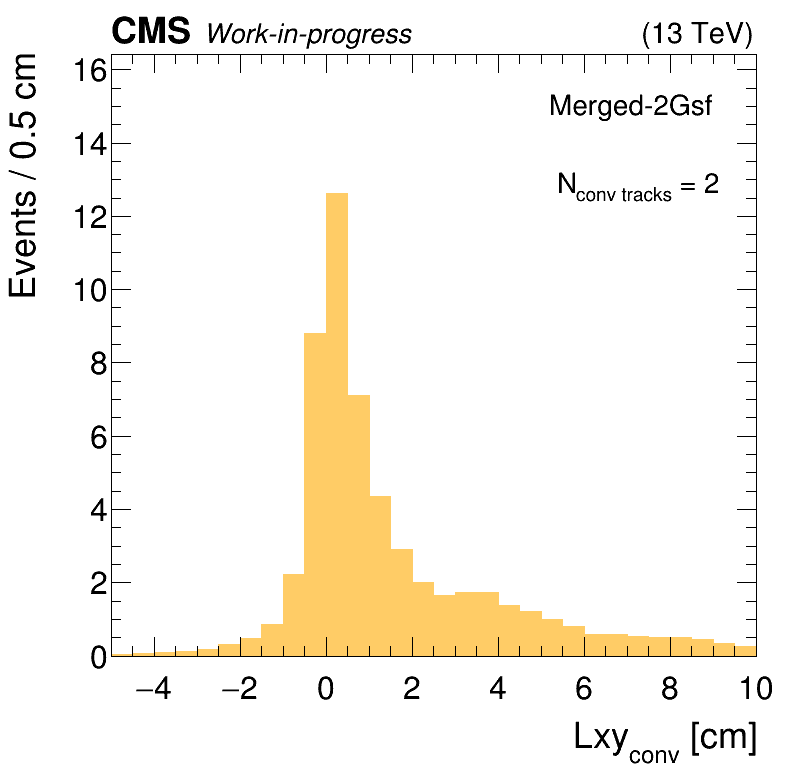

In [11]:
h1 = rdf.Filter("category == 2 && convMatched_lep1 && convNTrks_lep1 == 2").Histo1D(("h1", " ", 30, -5, 10), "convL0_lep1", "mcwei")

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()
# c1.SetLogy()

ymax = Draw1DHist(c1, [h1], ["#F8CE68"], ["#F8CE68"], xaxis = "Lxy_{conv} [cm]", yaxis = "Events / 0.5 cm", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.04)
ltx.DrawLatex(0.69, 0.85, "Merged-2Gsf")
ltx.DrawLatex(0.7, 0.75, "N_{conv tracks} = 2")

c1.Draw()

CMS (Preliminary) out of frame? --> True
lumiText =   (13 TeV)
procText =  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


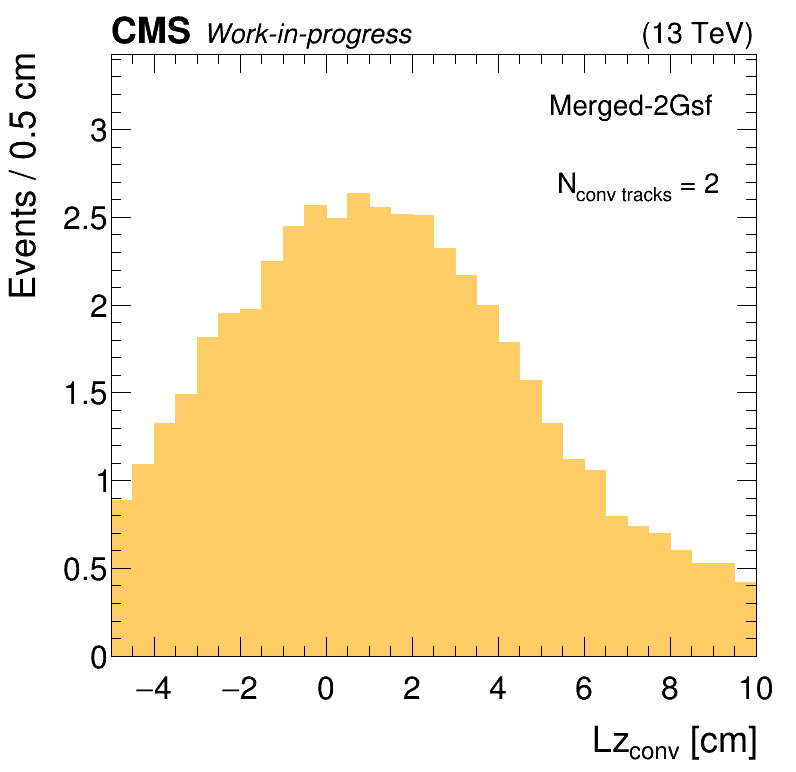

In [12]:
h1 = rdf.Filter("category == 2 && convMatched_lep1 && convNTrks_lep1 == 2").Histo1D(("h1", " ", 30, -5, 10), "convLz_lep1", "mcwei")

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()
# c1.SetLogy()

ymax = Draw1DHist(c1, [h1], ["#F8CE68"], ["#F8CE68"], xaxis = "Lz_{conv} [cm]", yaxis = "Events / 0.5 cm", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.04)
ltx.DrawLatex(0.69, 0.85, "Merged-2Gsf")
ltx.DrawLatex(0.7, 0.75, "N_{conv tracks} = 2")

c1.Draw()

In [13]:
def Draw1DHist2(c, vh, vc, vcl , xaxis = "x-axis", yaxis = "x-axis", option = "hist", Log = True):
    ROOT.gPad.SetRightMargin(0.05)
    ROOT.gPad.SetTopMargin(0.07)
    ROOT.gPad.SetLeftMargin(0.14)
    ROOT.gPad.SetBottomMargin(0.15)
    if (Log == True):
        c.SetLogy()

    # Set the axis style
    if (Log == True):
        ymax = vh[0].GetBinContent(vh[0].GetMaximumBin()) * 5
        ymin = 1E-2
    else: 
        ymax = vh[0].GetBinContent(vh[0].GetMaximumBin()) * 1.3
        ymin = 0
    vh[0].SetMarkerStyle(20)
    vh[0].SetMarkerSize(1.2)
    vh[0].GetXaxis().SetTitle(xaxis)
    vh[0].GetXaxis().SetMoreLogLabels()
    # vh[0].GetXaxis().SetTickSize(0.02)
    vh[0].GetXaxis().SetTitleSize(0.05)
    vh[0].GetXaxis().SetLabelSize(0.045)
    vh[0].GetXaxis().SetLabelOffset(0.02)
    vh[0].GetXaxis().SetTitleOffset(1.4)
    vh[0].GetYaxis().SetTitle(yaxis)
    vh[0].GetYaxis().SetRangeUser(ymin, ymax)
    # vh[0].GetYaxis().SetNdivisions(506)
    # vh[0].GetYaxis().SetTickSize(0.02)
    vh[0].GetYaxis().SetTitleSize(0.05)
    vh[0].GetYaxis().SetLabelSize(0.045)
    # vh[0].GetYaxis().SetLabelOffset(0.02)
    vh[0].GetYaxis().SetTitleOffset(1.4)

    # Set the color style and draw option
    for i, h in enumerate(vh):
        h.SetLineColor(ROOT.TColor.GetColor(vcl[i]))
        h.SetLineWidth(4)
        # h.SetFillColor(ROOT.TColor.GetColor(vc[i]))
        if (i == 0):
            h.Draw(option)
        else:
            h.Draw("%s same" %(option))
    return ymax

In [14]:
rdf_conv_m2 = rdf_conv_m2.Define("EscPconv", "eleSCEn_lep1/convP_lep1")

26.597834832966328
13.800776310265064
CMS (Preliminary) out of frame? --> True
lumiText =   (13 TeV)
procText =  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


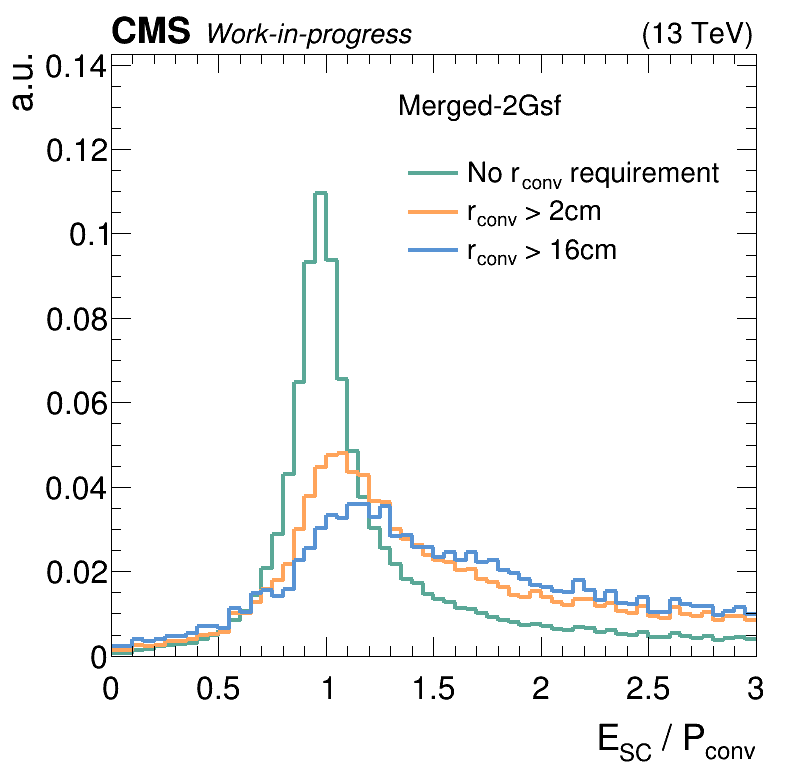

In [15]:
h1 = rdf_conv_m2.Histo1D(("h1", " ", 60, 0, 3), "EscPconv", "mcwei")
h1.Scale(1. / h1.Integral())

h2 = rdf_conv_m2.Filter("convVtxRadius_lep1 > 2", "r > 2").Histo1D(("h2", " ", 60, 0, 3), "EscPconv", "mcwei")
print(h2.Integral())
h2.Scale(1. / h2.Integral())


h3 = rdf_conv_m2.Filter("convVtxRadius_lep1 > 16", "r > 16").Histo1D(("h3", " ", 60, 0, 3), "EscPconv", "mcwei")
print(h3.Integral())
h3.Scale(1. / h3.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

ymax = Draw1DHist2(c1, [h1, h2, h3], ["#9ad3bc","#F8CE68", "#8ab6d6"], ["#5aa897","#ffa45b", "#5893d4"], xaxis = "E_{SC} / P_{conv}", yaxis = "a.u.", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.04)
ltx.DrawLatex(0.5, 0.85, "Merged-2Gsf")
# ltx.DrawLatex(0.7, 0.75, "r_{conv} = %d cm" %(r))

leg = ROOT.TLegend(0.5, 0.65, 0.85, 0.8)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "No r_{conv} requirement", "l")
leg.AddEntry(h2.GetPtr(), "r_{conv} > 2cm", "l")
leg.AddEntry(h3.GetPtr(), "r_{conv} > 16cm", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

In [16]:
rdf_conv_m1 = rdf_conv_m1.Define("EscPconv", "eleSCEn_lep1/convP_lep1")

7.947357803583145
5.641964964568615
CMS (Preliminary) out of frame? --> True
lumiText =   (13 TeV)
procText =  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


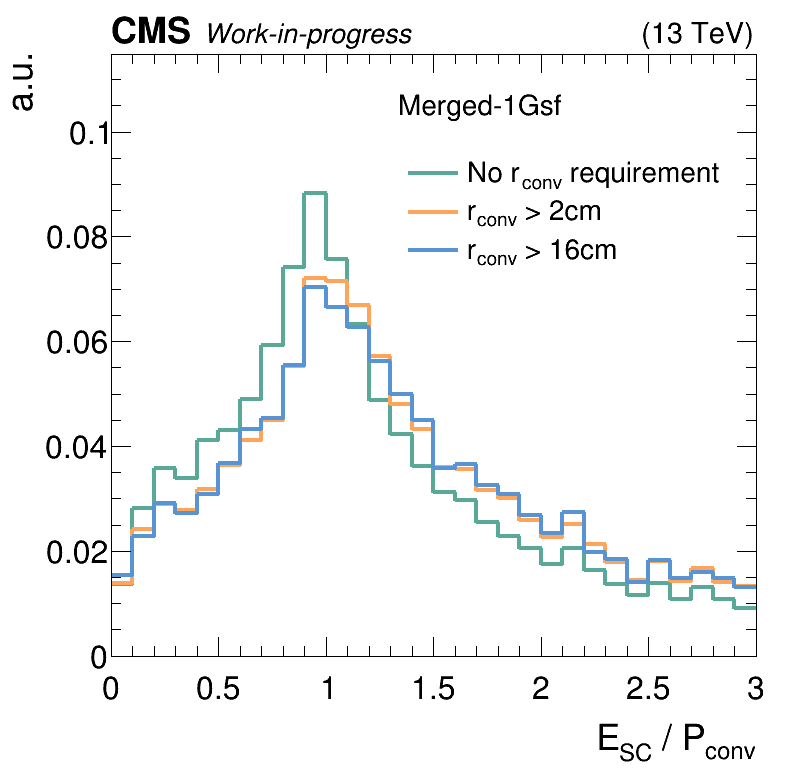

In [17]:
h1 = rdf_conv_m1.Histo1D(("h1", " ", 30, 0, 3), "EscPconv", "mcwei")
h1.Scale(1. / h1.Integral())

h2 = rdf_conv_m1.Filter("convVtxRadius_lep1 > 2", "r > 2").Histo1D(("h2", " ", 30, 0, 3), "EscPconv", "mcwei")
print(h2.Integral())
h2.Scale(1. / h2.Integral())


h3 = rdf_conv_m1.Filter("convVtxRadius_lep1 > 16", "r > 16").Histo1D(("h3", " ", 30, 0, 3), "EscPconv", "mcwei")
print(h3.Integral())
h3.Scale(1. / h3.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

ymax = Draw1DHist2(c1, [h1, h2, h3], ["#9ad3bc","#F8CE68", "#8ab6d6"], ["#5aa897","#ffa45b", "#5893d4"], xaxis = "E_{SC} / P_{conv}", yaxis = "a.u.", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.04)
ltx.DrawLatex(0.5, 0.85, "Merged-1Gsf")
# ltx.DrawLatex(0.7, 0.75, "r_{conv} = %d cm" %(r))

leg = ROOT.TLegend(0.5, 0.65, 0.85, 0.8)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "No r_{conv} requirement", "l")
leg.AddEntry(h2.GetPtr(), "r_{conv} > 2cm", "l")
leg.AddEntry(h3.GetPtr(), "r_{conv} > 16cm", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()